<a href="https://colab.research.google.com/github/sayarghoshroy/Intro_to_DL_tutorial/blob/master/regression_%26_minimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [0]:
# Plotting Functions
# No need to Understand Details for the purpose of the tutorial
# For now, think of the functionality in this cell as a black box

def make_plot(seq, errors):
    make_error_plot(errors)
    make_convergence_plot(seq)

def make_error_plot(errors):
    fig = plt.figure(figsize=(9, 9))
    p = fig.add_subplot('111')
    p.set_title('Error v/s Epoch')
    p.set_xlabel('Epoch Number')
    p.set_ylabel('Error')
    p.plot(list(range(1, len(errors))), errors[1:])
    plt.show()

def make_convergence_plot(seq, example = 1, xlabel = 'a', ylabel = 'b'):
    # require different plotting ranges for examples 1 and 2

    fig = plt.figure(figsize=(9, 9))
    q = fig.add_subplot('111')

    a_min = min([s[0] for s in seq])
    a_max = max([s[0] for s in seq])

    b_min = min([s[1] for s in seq])
    b_max = max([s[1] for s in seq])

    eps = 0.95
    if xlabel == 'a':
        eps = 0.2

    if example == 1:
        a = np.linspace(a_min - eps, a_max + eps, 500)
        b = np.linspace(b_min - eps, b_max + eps, 500)
    
    else:
        a = np.linspace(-1, 1, 500)
        b = np.linspace(-1, 1, 500)

    X, Y = np.meshgrid(a, b)
    J = np.ones(shape = (len(a), len(b)))

    # compute J for all pairs of a, b
    for i in range(len(a)):
        for j in range(len(b)):
            if example == 1:
                J[i][j] = np.linalg.norm((2 * x_1 + 3 * x_2) - (a[i] * x_1 + b[j] * x_2))
            elif example == 2:
                J[i][j] = a[i] * a[i] + 100 * np.power((b[j] - a[i] * a[i]), 2)
    
    q.set_title('Convergence Path')
    q.set_xlabel(xlabel)
    q.set_ylabel(ylabel)
    q.contour(X, Y, J, cmap = cm.coolwarm)

    # plotting the arrow-ed path
    aspace = 0.1 # scaling factor

    # r is the distance spanned between pairs of points
    r = [0]
    for i in range(1,len(seq)):
        dx = seq[i][0]-seq[i-1][0]
        dy = seq[i][1]-seq[i-1][1]
        val = np.sqrt(dx ** 2 + dy ** 2)
        r.append(val)
    r = np.asarray(r)

    # r_sum is the cumulative sum of r
    r_sum = []
    for i in range(len(r)):
        r_sum.append(r[0: i].sum())
    r_sum.append(r.sum())

    arrow_data = [] # holds tuples of (x, y, theta) for each arrow
    arrow_pos = 0 # current point on walk along data
    r_count = 1

    while arrow_pos < r.sum():
        x1, x2 = seq[r_count-1][0], seq[r_count][0]
        y1, y2 = seq[r_count-1][1], seq[r_count][1]
        da = arrow_pos - r_sum[r_count] 
        theta = np.arctan2((x2 - x1), (y2 - y1))
        ax = np.sin(theta) * da + x1
        ay = np.cos(theta) * da + y1

        arrow_data.append((ax, ay, theta))
        arrow_pos += aspace

        while arrow_pos > r_sum[r_count + 1]: 
            r_count += 1
            if arrow_pos > r_sum[-1]:
                break

    for ax, ay, theta in arrow_data:
        q.arrow(ax, ay, np.sin(theta) * aspace / 10, np.cos(theta) * aspace / 10, head_width = aspace / 2.5 , head_length = aspace / 1.5 , color = 'darkgreen')

    q.plot([s[0] for s in seq], [s[1] for s in seq], color = 'green')
    

    plt.show()

## *Example 1: Regression*

$We\ consider\ the\ following\ linear\ regression\ function:$
$y = 2x_1 + 3x_2$

$We\ sample\ y(s)\ of\ the\ form\ y^i\ =\ 2x_1^i + 3x_2^i + \epsilon$

$Here; \epsilon ∼ \mathcal{N}(0, 0.01)$

$We\ generate\ 400\ samples\ (x_1^i, x_2^i)\ uniformly\ from\ [−4, 4]^2\ with\ their\ corresponding\ y^i\ values.$

In [0]:
# Data Creation
N_samples = 400
x_1 = np.random.uniform(low= - 4.0, high = 4.0, size = N_samples)
x_2 = np.random.uniform(low = -4.0, high = 4.0, size = N_samples)
noise = np.random.normal(0, 0.01, N_samples)
y = 2 * x_1 + 3 * x_2 + noise

$let\ y' = a.x_1 + b.x_2$

$ Generic\ L2\ Loss\ where\ y\ can\ be\ vector\ valued: $

$J\enspace = \frac{1}{N}||y' - y||_2$

$\quad\ = \frac{1}{N}(y'-y)^T(y'-y)$

$\quad\ = \frac{1}{N}(y'^T-y^T).(y'-y)$

$\quad\ = \frac{1}{N}(y'^T.y' - y'^Ty - y^Ty' - y^Ty)$

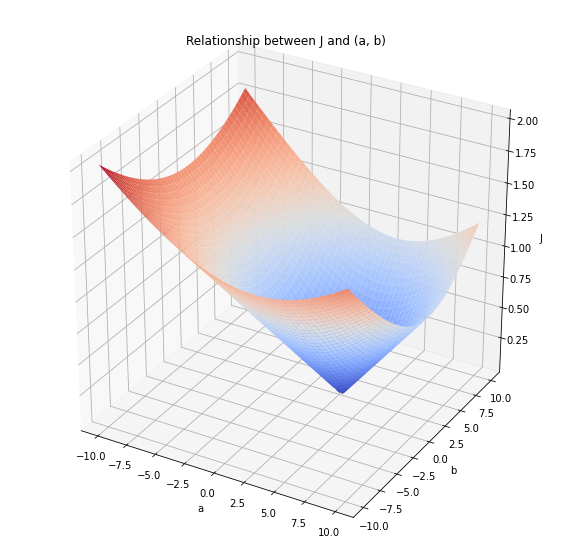

In [0]:
# Plotting the Loss Function

a = np.linspace(-10, 10, 200)
b = np.linspace(-10, 10, 200)
# a, b are the parameter values

X, Y = np.meshgrid(a, b)
J = np.ones(shape = (len(a), len(b)))

# compute J for all pairs of a, b
for i in range(len(a)):
    for j in range(len(b)):
        J[i][j] = np.linalg.norm((2 * x_1 + 3 * x_2) - (a[i] * x_1 + b[j] * x_2)) / N_samples

# creating the 3D Plot
fig = plt.figure(figsize=(10, 10))
sub = fig.add_subplot(111, projection='3d')
sub.set_title('Relationship between J and (a, b)')
sub.set_xlabel('a')
sub.set_ylabel('b')
sub.set_zlabel('J')
sub.plot_surface(X, Y, J, cmap = cm.coolwarm)
# plt.savefig('loss.png')
plt.show()

In [0]:
# NOTE: For the purpose of coding, I am not considering the division by number of samples
# This is a normalizing denominator and is absorbed into multiplicative constants

$ Minimizing\ J\ using\ gradient\ descent.$

$\frac{\partial J}{\partial a} = \frac{2}{N}y'.\frac{\partial y'}{\partial a} - \frac{2}{N}y \frac{\partial y'}{\partial a}$

$ = \frac{2}{N}(y' - y)\frac{\partial y'}{\partial a}$

$Similarly,\ \frac{\partial J}{\partial b} = \frac{2}{N}(y' - y)\frac{\partial y'}{\partial b}$

$Now,\ \frac{\partial y'}{\partial a} = x_1,$
$\ \frac{\partial y'}{\partial b} = x_2$

$Therefore:$

$\frac{\partial J}{\partial a} = \frac{2}{N}(ax_1 + bx_2 - y).x_1 = \frac{2}{N}ax_1.x_1 + \frac{2}{N}bx_1.x_2 - \frac{2}{N}y.x_1$

$\frac{\partial J}{\partial b} = \frac{2}{N}(ax_1 + bx_2 - y).x_2 = \frac{2}{N}ax_1.x_2 + \frac{2}{N}bx_2.x_2 - \frac{2}{N}y.x_2$


$\nabla J =\bigg [\frac{\partial J}{\partial a}\quad \frac{\partial J}{\partial b}\bigg ]$

In [0]:
def loss(a, b):
    return np.linalg.norm((a * x_1 + b * x_2) - y) / N_samples

def regression_gradient_descent(eta):
    a = b = 0
    errors = [loss(a, b)]
    seq = [(0, 0)]
    MAX_ITER = 100
    iteration = 0

    while errors[-1] >= 1e-3 and iteration < MAX_ITER:
        # using the accurate version of optimal learning rate
        del_J_del_a = 2 * a * np.dot(x_1, x_1) + 2 * b * np.dot(x_1, x_2) - 2 * np.dot(y, x_1)
        del_J_del_b = 2 * a * np.dot(x_1, x_2) + 2 * b * np.dot(x_2, x_2) - 2 * np.dot(y, x_2)
        del_J = np.asarray([del_J_del_a, del_J_del_b])

        # update step
        a = a - eta * del_J_del_a
        b = b - eta * del_J_del_b
        seq.append((a, b))
        errors.append(loss(a, b))
        iteration += 1
    
    return errors, seq, a, b

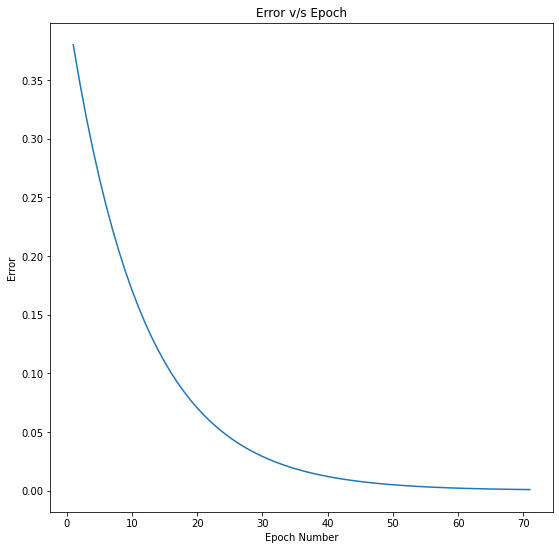

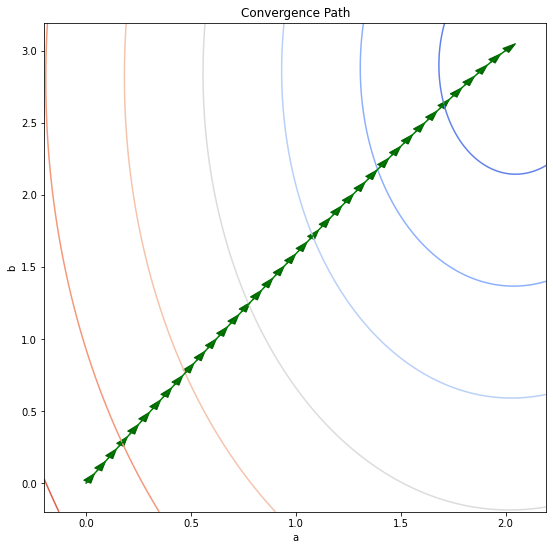

Optimal Values for: 
a : 1.9943410854447554
b : 2.995268533681922


In [0]:
e, s, a_opt, b_opt = regression_gradient_descent(2e-5)
make_plot(s, e)
# output:
print("Optimal Values for: ")
print("a : " + str(a_opt))
print("b : " + str(b_opt))

# *Example 2: Minimization of Functions*

$f(x, y) = x^2 + 100(y - x^2)^2$

$\frac{\partial f}{\partial x} = 2x + 200(y - x^2)(-2x) = 2x[1 - 200(y - x^2)]$

$\frac{\partial f}{\partial y} = 200(y - x^2)$

### $Try\ Visualizing\ this\ function\ in\ 2\ Dimensions$

In [0]:
def check_convergence(seq):
    threshold = 1e-8
    if len(seq) > 1 and np.abs(seq[-1][0] - seq[-2][0]) < threshold and np.abs(seq[-1][1] - seq[-2][1]) < threshold:
        return True
    return False

In [0]:
def generic_gradient_descent(f, grad_x, grad_y):
    # f is the function to be minimized
    # grad_x and grad_y are functions which accept (x, y)
    # and return partial derivatives of f w.r.t x and y respectively
    
    x = np.random.random()
    y = np.random.random()
    # initialized values

    seq = [(x, y)] # sequence of x, y
    MAX_ITER = 1e5
    iteration = 0
    eta = 1e-3

    while iteration < MAX_ITER and check_convergence(seq) == False:
        # update step
        del_x = grad_x(x, y)
        del_y = grad_y(x, y)
        x = x - eta * del_x
        y = y - eta * del_y
        
        seq.append((x, y))
        iteration += 1
    
    print("Number of Iterations: " + str(iteration))
    print("f* = " + str(f(x, y)))
    print("(x*, y*) = " + "(" + str(seq[-1][0]) + ", " + str(seq[-1][1]) + ")")
    return seq

Number of Iterations: 6391
f* = 2.4850811706221377e-11
(x*, y*) = (4.985058846813717e-06, 2.5357453629664048e-11)


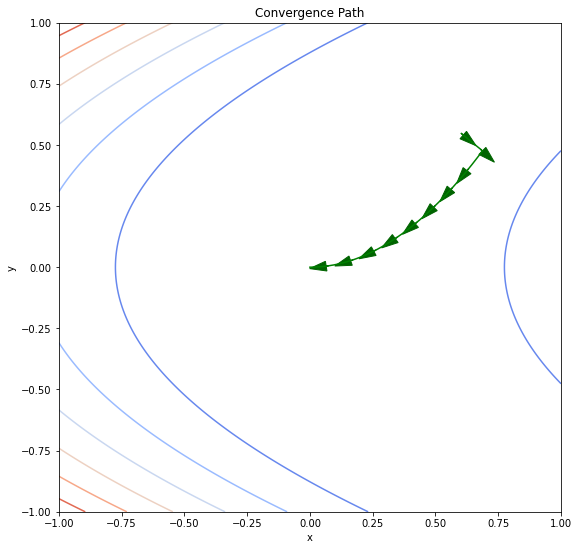

In [0]:
seq = generic_gradient_descent(lambda x, y: x ** 2 + 100 * ((y - x ** 2) ** 2),
                             lambda x, y: (2 * x * (1 - 200 * (y - x ** 2))),
                             lambda x, y : (200 * (y - x ** 2)))

make_convergence_plot(seq, 2, 'x', 'y')

In [0]:
# ^_^ Thank You